## **pyTopoComplexity**
### **Example for using `RugosityIndex` from `pyrugosity.py` to calculate rugosity index** 

`RugosityIndex` measures **rugosity index** of the land surface, which is widely used to assess landscape structural complexity. Such method has been applied in classifying seafloor types by marine geologists and geomorphologist, small-scale hydrodynamics by oceanographers, and studying available habitats in the landscape by ecologists and coral biologists (Wilson et al., 2007).

The example GeoTIFF rasters include LiDAR Digital Elevation Model (DEM) files that cover the area affected by a deep-seated landslide that occurred in 2014 in the Oso area of the North Fork Stillaguamish River valley, Washington State, USA (Washington Geological Survey, 2023). These example DEMs vary in grid spacing (i.e., grid size), coordinate reference system (CRS), and unit of grid value (elevation, Z).

Archives of codes and example DEM data:
* Zenodo: https://doi.org/10.5281/zenodo.11239338
* Github repository: https://github.com/GeoLarryLai/pyTopoComplexity
<hr>

### **Theory**

The rugosity index is determined as the ratio of the contoured area (i.e., true geometric surface area) to the planimetric area within the square moving window, highlighting smaller-scale variations in surface height: 

$$
\text{Rugosity Index} = \frac{\text{contoured area}}{\text{planimetric area}}
$$

This module adapts the Triangulated Irregular Networks (TIN) method from Jenness (2004), which approximates the contoured area as the sum of eight truncated-triangle areas. These triangles connect the central grids, four corner grids, and four grids at the middle points of the surrounding edges within the moving window. If no local slope correction is applied, the planimetric area is considered to be the horizontal planar area of the moving window, as decribed in Jenness (2004). Another approach considers slope correction where to the planimetric area is projected onto an plane of the local gradient (Du Preez, 2015). 

By definition, the rugosity index is as a minimum value of one (completely flate surface). Typical valuesrange of the conventional rugosity index (without slope correction) from one to three although larger values are possible in very steep terrains. The slope-corrected rugosity index, also called arc-chord ratio (ACR) rugosity index, could provide a better representation of local surface complexity.
<hr>

### **References**
##### Journal Articles: 
* Du Preez, C. (2015) A new arc–chord ratio (ACR) rugosity index for quantifying three-dimensional landscape structural complexity. Landscape Ecol 30, 181–192. https://doi.org/10.1007/s10980-014-0118-8
* Jenness, J.S. (2004) Calculating landscape surface area from digital elevation models. Wildlife Society Bulletin, 32: 829-839. https://doi.org/10.2193/0091-7648(2004)032[0829:CLSAFD]2.0.CO;2 
* Wilson, M.F.J., O’Connell, B., Brown, C., Guinan, J.C., Grehan, A.J., 2007. Multiscale Terrain Analysis of Multibeam Bathymetry Data for Habitat Mapping on the Continental Slope. Marine Geodesy 30, 3-35. https://doi.org/10.1080/01490410701295962.

##### Digital Elevation Model (DEM) Examples:
* Washington Geological Survey, 2023. 'Stillaguamish 2014' project [lidar data]: originally contracted by Washington State Department of Transportation (WSDOT). [accessed April 4, 2024, at http://lidarportal.dnr.wa.gov]
<hr>

#### 0. Import packages
Import the `RugosityIndex` class from the `pyrugosity.py` module.

In [1]:
import os
from pytopocomplexity import RugosityIndex

#### 1. Import raster

In [2]:
# File handling
base_dir = os.getcwd()  # Change the directory of base folder as needed
base_dir = os.path.join(base_dir, 'ExampleDEM')

input_file = 'Ososlid2014_f_3ftgrid.tif'
input_dir = os.path.join(base_dir, input_file)

#### 2. Run pyrugosity analysis
The default setting enables `chunk_processing=True` to avoid RAM issues when processing a large raster. 

Users can specify the value of `window_size` to define the edge size (numbers of grids) of the moving window (N x N). A larger window size will capture broader-scale topographic features, while a smaller window size will highlight more local variations.

Users can decide whether slope correction is applied (the default setting enables slope correction). When `slope_correction=True`, it will return arc-chord ratio (ACR) rugosity index ([Du Preez, 2015](https://doi.org/10.1007/s10980-014-0118-8)). When `slope_correction=False`, it will return conventional rusotity index ([Jenness, 2004](https://doi.org/10.2193/0091-7648(2004)032[0829:CLSAFD]2.0.CO;2)).

In [3]:
# Create an instance of pyrugosity
rgty = RugosityIndex(window_size=17)
#window_size must be an odd number and >= 3 (default is set to 3, following Jenness (2004))

# Run analysis using pyrugosity module
_, _, window_m = rgty.analyze(input_dir, slope_correction=True, chunk_processing=True, chunksize=(512, 512))
# The function can return 
# (1) 'Z' (elevation), 
# (2) 'Rugosity_result' (the result array of rugosity index calculation), and 
# (3) 'window_m' (the converted window size in meters, calculated from defined 'window_size' and the grid spacing of the input raster)

[########################################] | 100% Completed | 16.03 ss


#### 3. Export results

The `export_result` function will save the output as a new GeoTIFF raster in the same folder as your input raster.

* When `slope_correction=True`, the exported GeoTIFF file will have the name with "_ACR".
* When `slope_correction=False`, the exported GeoTIFF file will have the name with "_Conv".

In [4]:
# Generate output file name
if rgty.slope_correction:
    output_file = os.path.splitext(input_file)[0] + f'_pyRugosity_ACR({round(window_m, 2)}m).tif'
else:
    output_file = os.path.splitext(input_file)[0] + f'_pyRugosity_Conv({round(window_m, 2)}m).tif'
output_dir = os.path.join(base_dir, output_file)

# Export the result using pyrugosity module
rgty.export_result(output_dir)

Processed result saved to Ososlid2014_f_3ftgrid_pyRugosity_ACR(15.54m).tif


#### 4. Display results

When `savefig = True`, the `plot_result` function will save the output figure in the same folder as your input raster file.

Figure saved as 'Ososlid2014_f_3ftgrid_pyRugosity_ACR(15.54m).png'


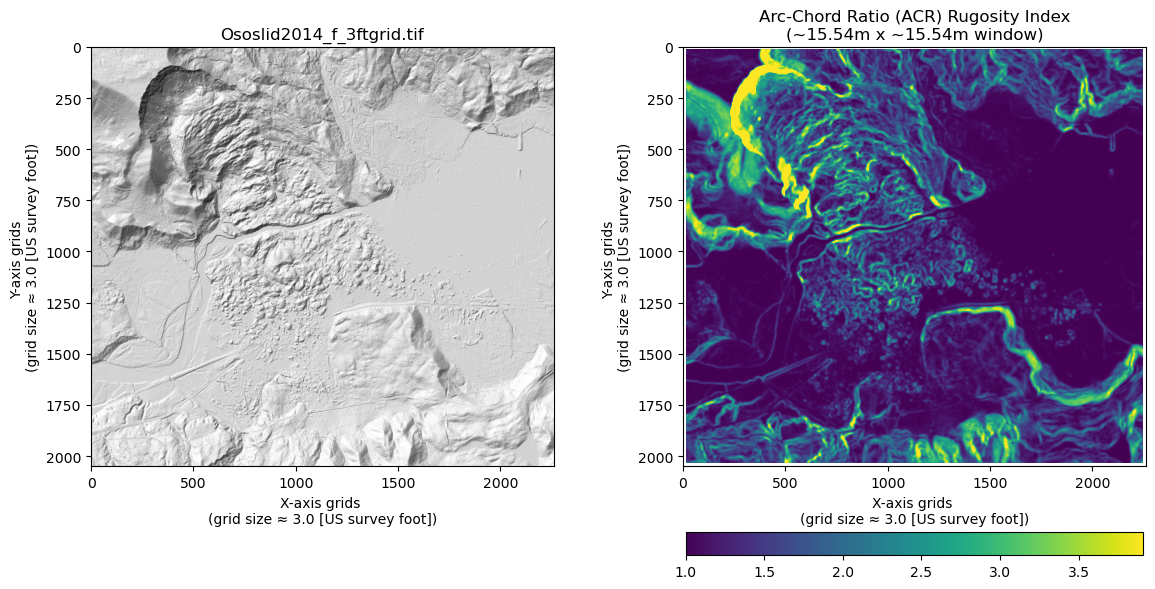

In [5]:
# Plot and save the results
rgty.plot_result(savefig=True)